In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras.layers.recurrent import GRU


# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
df['Time ']=Normal_DPx['Time ']
df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [13]:
Cavdf['Time ']=Cavitation_DPx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [14]:
X_train=df

In [15]:
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [16]:
X_train=X_train.drop(columns=['Time '])

In [17]:
X_train=np.array(X_train)


In [18]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [19]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [20]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.GRU(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.GRU(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.GRU(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.GRU(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [21]:
X_test=Cavdf

In [22]:
X_test=X_test.drop(columns=['Time '])

In [23]:
X_test.shape

(1048576, 5)

In [24]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 41s 19ms/step - loss: 0.3123 - val_loss: 0.3498
Epoch 2/150
1797/1797 [==============================] - 33s 18ms/step - loss: 0.1232 - val_loss: 0.2058
Epoch 3/150
1797/1797 [==============================] - 33s 18ms/step - loss: 0.0771 - val_loss: 0.1794
Epoch 4/150
1797/1797 [==============================] - 33s 18ms/step - loss: 0.0647 - val_loss: 0.1545
Epoch 5/150
1797/1797 [==============================] - 33s 19ms/step - loss: 0.0583 - val_loss: 0.1464
Epoch 6/150
1797/1797 [==============================] - 32s 18ms/step - loss: 0.0548 - val_loss: 0.1491
Epoch 7/150
1797/1797 [==============================] - 32s 18ms/step - loss: 0.0533 - val_loss: 0.1674
Epoch 8/150
1797/1797 [==============================] - 34s 19ms/step - loss: 0.0506 - val_loss: 0.1502
Epoch 9/150
1797/1797 [==============================] - 32s 18ms/step - loss: 0.0504 - val_loss: 0.1500
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 37s 21ms/step - loss: 0.0342 - val_loss: 0.1280
Epoch 79/150
1797/1797 [==============================] - 39s 22ms/step - loss: 0.0341 - val_loss: 0.1263
Epoch 80/150
1797/1797 [==============================] - 38s 21ms/step - loss: 0.0342 - val_loss: 0.1361
Epoch 81/150
1797/1797 [==============================] - 37s 21ms/step - loss: 0.0336 - val_loss: 0.1327
Epoch 82/150
1797/1797 [==============================] - 40s 22ms/step - loss: 0.0338 - val_loss: 0.1364
Epoch 83/150
1797/1797 [==============================] - 39s 22ms/step - loss: 0.0337 - val_loss: 0.1273
Epoch 84/150
1797/1797 [==============================] - 40s 22ms/step - loss: 0.0337 - val_loss: 0.1439
Epoch 85/150
1797/1797 [==============================] - 41s 23ms/step - loss: 0.0334 - val_loss: 0.1173
Epoch 86/150
1797/1797 [==============================] - 39s 22ms/step - loss: 0.0337 - val_loss: 0.1319
Epoch 87/150
1797/1797 [==============================] - 3

In [25]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 83s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

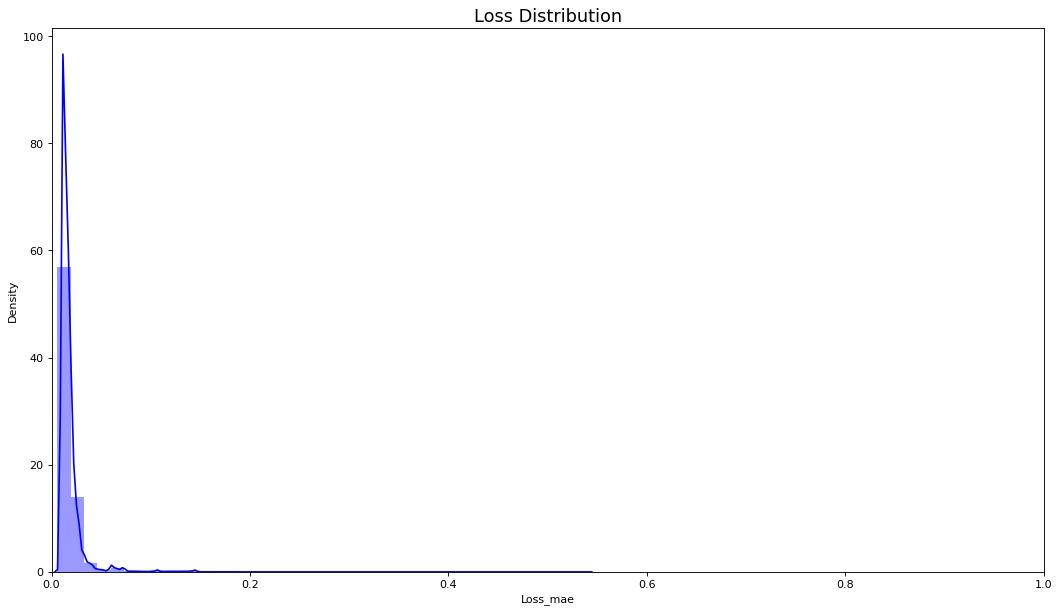

In [26]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [27]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 104s 3ms/step


In [28]:
X_test=np.array(X_test)
X_test.shape

(1048576, 5)

In [29]:
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

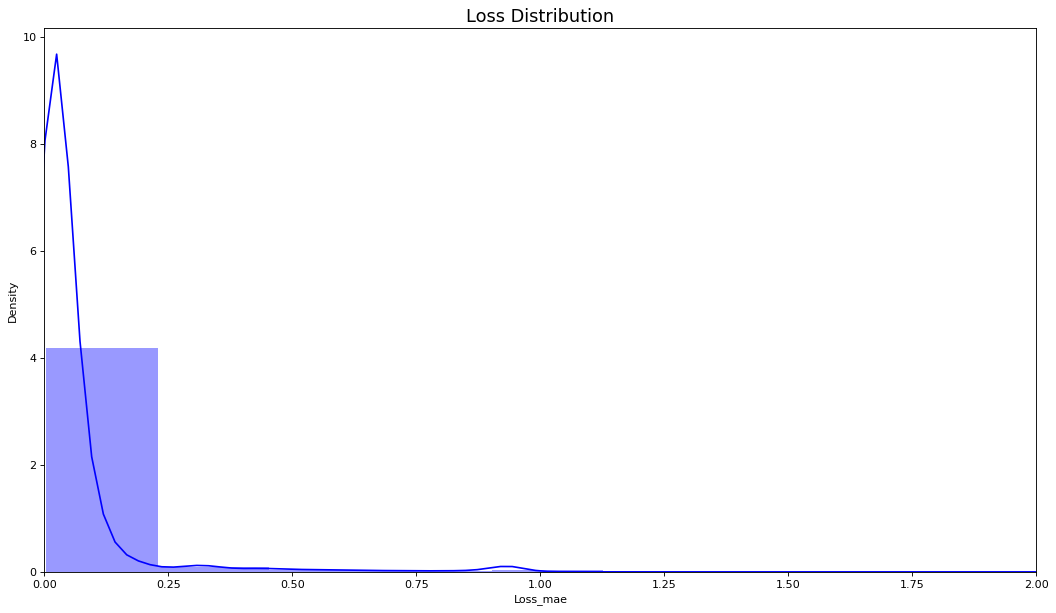

In [30]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.25, 1.0)

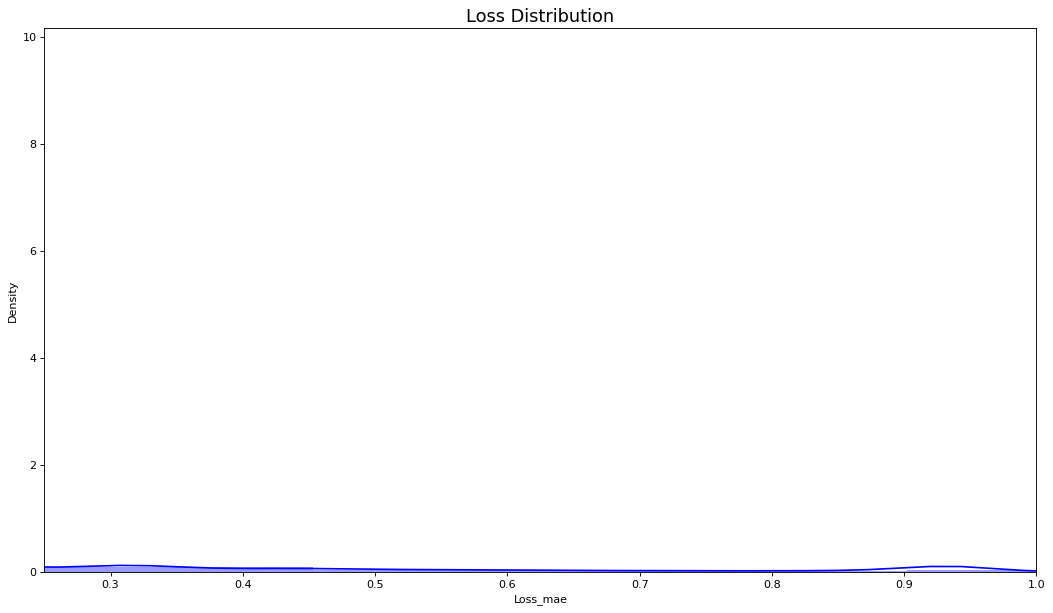

In [31]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.25,1])

In [32]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.5

In [33]:
test_mae_loss.shape

(1048576, 1)

In [34]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


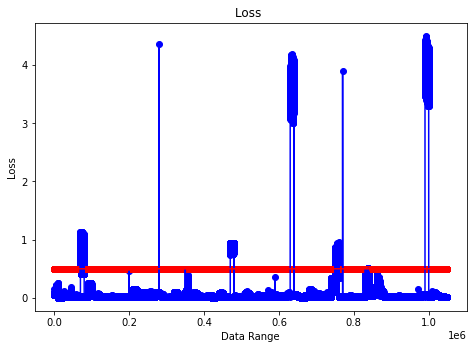

In [35]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [36]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000,0.148644,0.5,False
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098,0.069321,0.5,False
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195,0.066348,0.5,False
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293,0.077493,0.5,False
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391,0.054846,0.5,False
...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512,0.015967,0.5,False
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609,0.014992,0.5,False
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707,0.016552,0.5,False
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805,0.016477,0.5,False


In [37]:
test_score_df["anomaly"][1]

False

In [38]:
anomalies=test_score_df


In [39]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
70000,-0.187036,0.650006,-3.941114,0.762623,-0.222841,6.835937,0.700530,0.5,True
70001,-0.274693,0.650006,-3.941114,0.229719,-0.310760,6.836035,0.549275,0.5,True
70002,-0.274693,0.650006,-3.941114,0.930669,-0.310760,6.836133,0.721115,0.5,True
70003,-0.274693,0.650006,-3.941114,0.694393,-0.310760,6.836230,0.660351,0.5,True
70004,-0.274693,0.650006,-3.941114,0.578893,-0.310760,6.836328,0.631292,0.5,True
...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-0.095819,-4.897004,97.655762,3.860682,0.5,True
999996,-4.945634,-1.169536,0.439230,0.547380,-4.897004,97.655859,3.989321,0.5,True
999997,-4.945634,-1.169536,0.439230,-0.250711,-4.897004,97.655957,3.829703,0.5,True
999998,-4.945634,-1.169536,0.439230,0.261233,-4.897004,97.656055,3.932092,0.5,True


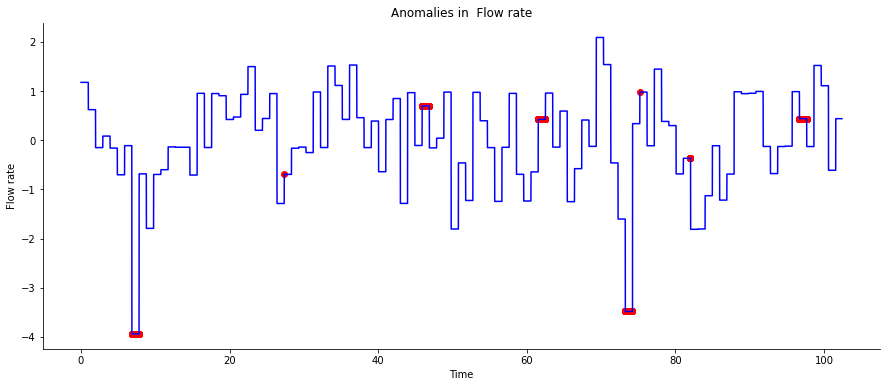

In [40]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

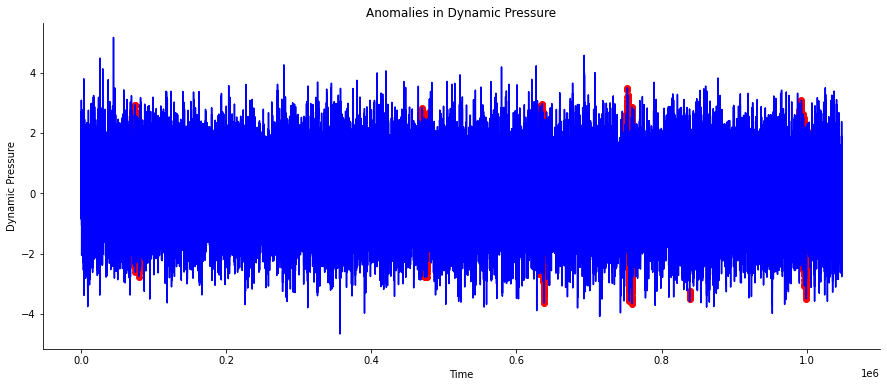

In [41]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

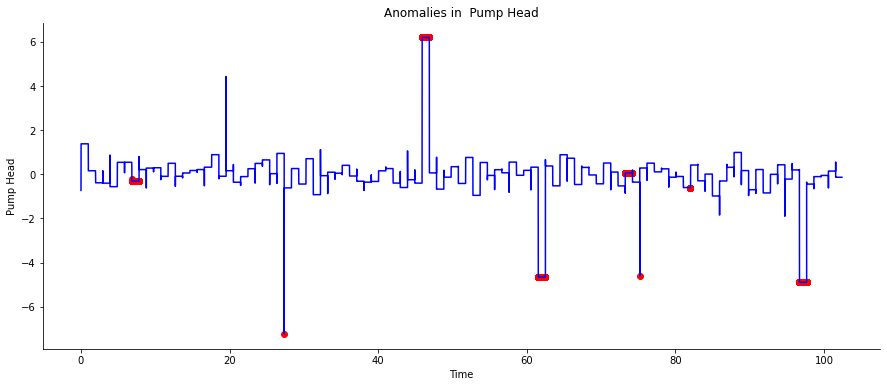

In [42]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

In [43]:
model.save("GRU01_DP")


INFO:tensorflow:Assets written to: GRU01_DP\assets


# Vibration


In [44]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [45]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [46]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [47]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [48]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [49]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [50]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [51]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [52]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [53]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [54]:
df['Time ']=Normal_Vibx['Time ']
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167,0.000195
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167,0.000391
...,...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558,89.843555


In [55]:
Cavdf['Time ']=Cavitation_Vibx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391
...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805


In [56]:
X_train=df

In [57]:
X_train=X_train.drop(columns=['Time '])

In [58]:
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558


In [59]:
X_train=np.array(X_train)


In [60]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [61]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [67]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.GRU(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.GRU(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.GRU(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.GRU(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [68]:
X_test=Cavdf

In [69]:
X_test=X_test.drop(columns=['Time '])

In [70]:
X_test.shape

(1048576, 6)

In [71]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 64s 32ms/step - loss: 0.3583 - val_loss: 0.3232
Epoch 2/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.1068 - val_loss: 0.1140
Epoch 3/150
1797/1797 [==============================] - 51s 29ms/step - loss: 0.0640 - val_loss: 0.0972
Epoch 4/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.0572 - val_loss: 0.0661
Epoch 5/150
1797/1797 [==============================] - 54s 30ms/step - loss: 0.0564 - val_loss: 0.0692
Epoch 6/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.0540 - val_loss: 0.0705
Epoch 7/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0522 - val_loss: 0.0713
Epoch 8/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0518 - val_loss: 0.0550
Epoch 9/150
1797/1797 [==============================] - 54s 30ms/step - loss: 0.0519 - val_loss: 0.0577
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 57s 32ms/step - loss: 0.0371 - val_loss: 0.0739
Epoch 79/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0371 - val_loss: 0.0633
Epoch 80/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0368 - val_loss: 0.0636
Epoch 81/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0365 - val_loss: 0.0643
Epoch 82/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0362 - val_loss: 0.0757
Epoch 83/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0360 - val_loss: 0.0547
Epoch 84/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0364 - val_loss: 0.0601
Epoch 85/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0364 - val_loss: 0.0597
Epoch 86/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0363 - val_loss: 0.0588
Epoch 87/150
1797/1797 [==============================] - 6

In [72]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 83s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

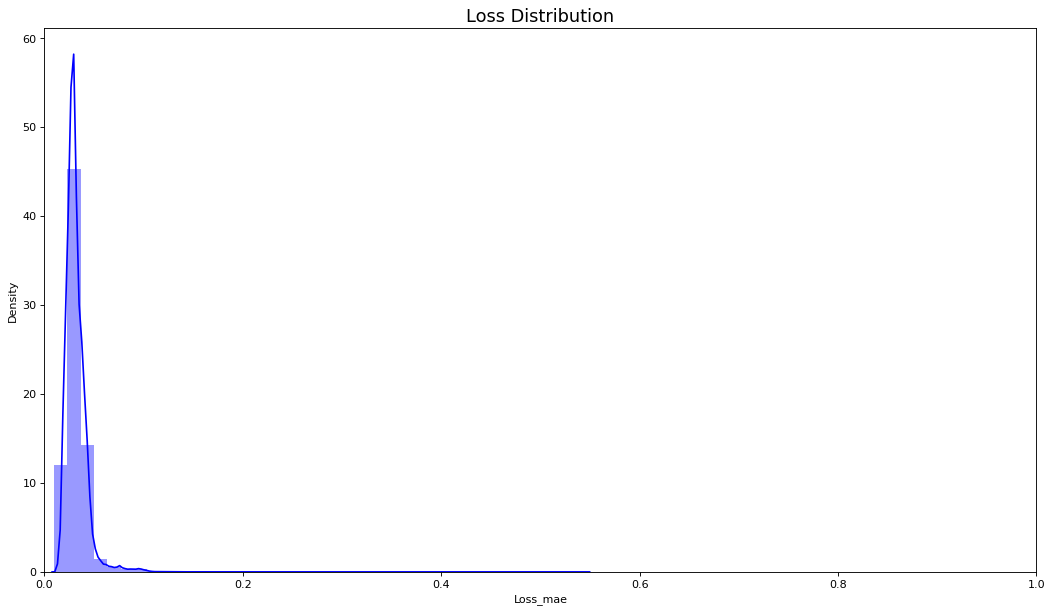

In [73]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [74]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 107s 3ms/step


In [75]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

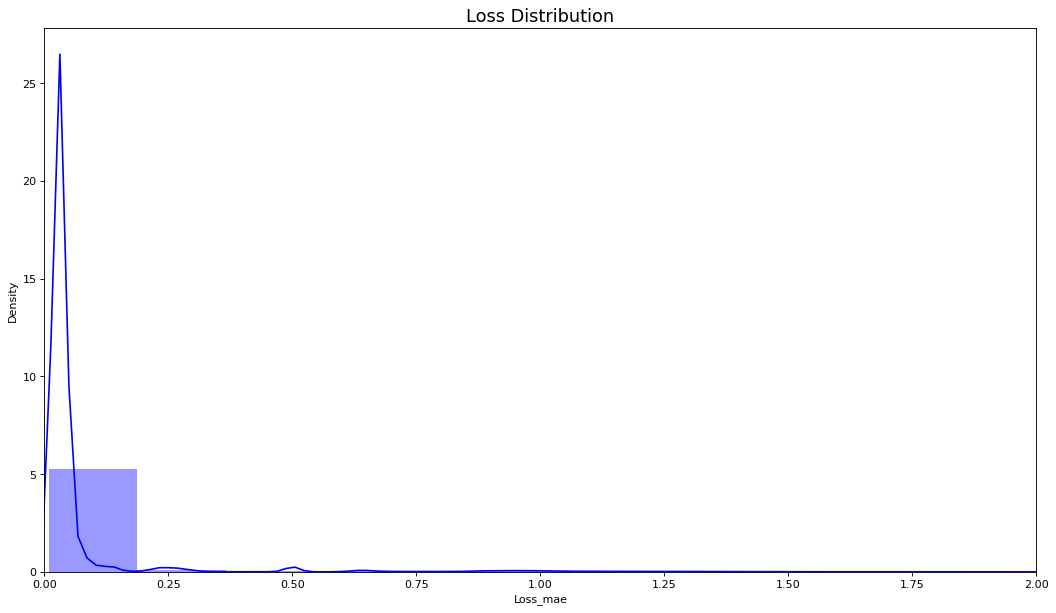

In [76]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

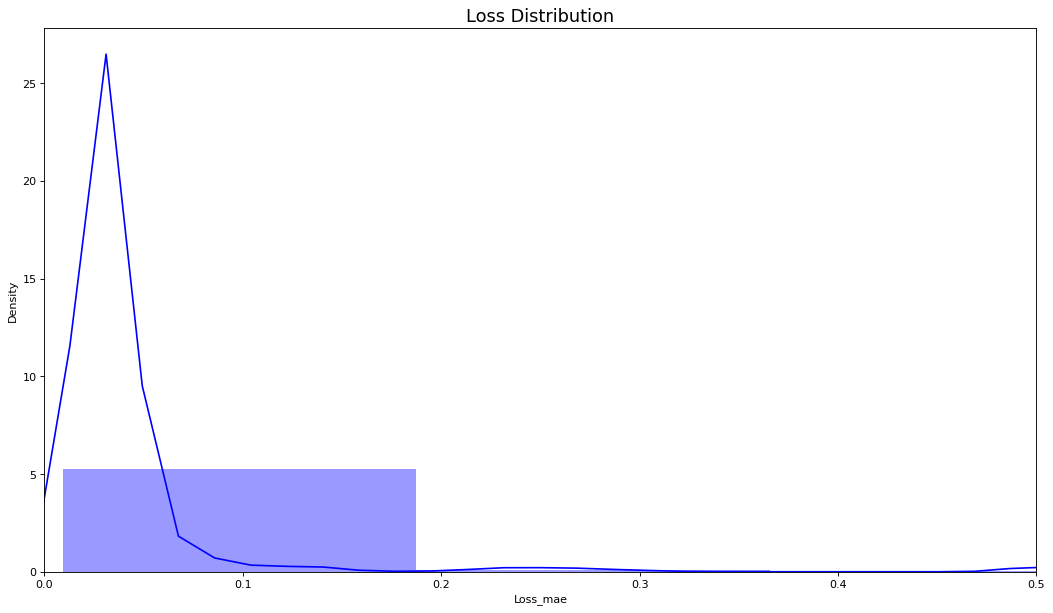

In [77]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0,0.5])

In [78]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.3

In [79]:
test_mae_loss.shape

(1048576, 1)

In [80]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


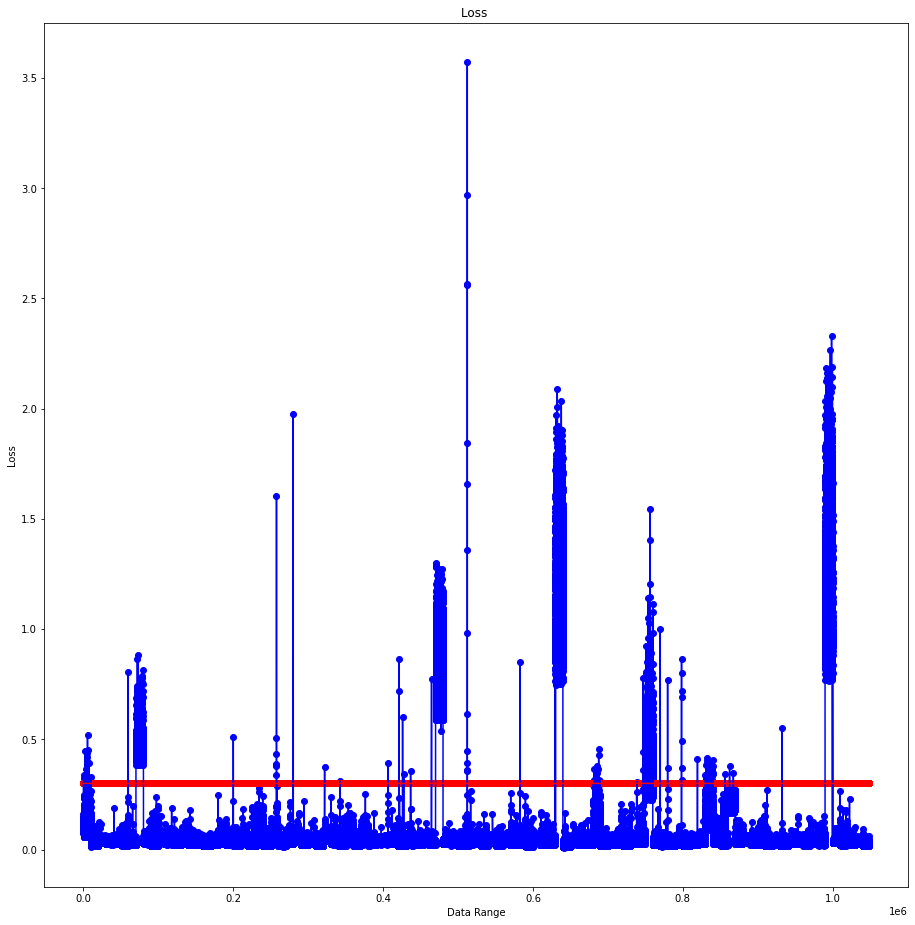

In [81]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [82]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000,0.140703,0.3,False
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098,0.103356,0.3,False
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195,0.100062,0.3,False
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293,0.112725,0.3,False
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391,0.142708,0.3,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512,0.019789,0.3,False
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609,0.018915,0.3,False
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707,0.019592,0.3,False
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805,0.020613,0.3,False


In [83]:
test_score_df["anomaly"][1]

False

In [84]:
anomalies=test_score_df


In [85]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
97,1.465952,1.664881,1.177414,2.944775,-1.176894,1.380058,0.009473,0.324127,0.3,True
1307,1.465952,1.664881,1.177414,4.096046,-0.769057,1.380058,0.127637,0.338362,0.3,True
2354,1.465952,1.664881,1.177414,2.971521,-2.188245,1.380058,0.229883,0.447572,0.3,True
2368,1.465952,1.664881,1.177414,2.935494,-1.068830,1.380058,0.231250,0.302444,0.3,True
3002,1.465952,1.664881,1.177414,3.397465,-0.844246,1.380058,0.293164,0.367071,0.3,True
...,...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-1.258038,1.267361,-4.897004,97.655762,0.996087,0.3,True
999996,-4.945634,-1.169536,0.439230,-1.532954,0.276891,-4.897004,97.655859,0.919231,0.3,True
999997,-4.945634,-1.169536,0.439230,-1.389872,-1.524488,-4.897004,97.655957,0.800133,0.3,True
999998,-4.945634,-1.169536,0.439230,-0.336533,-1.072029,-4.897004,97.656055,0.962191,0.3,True


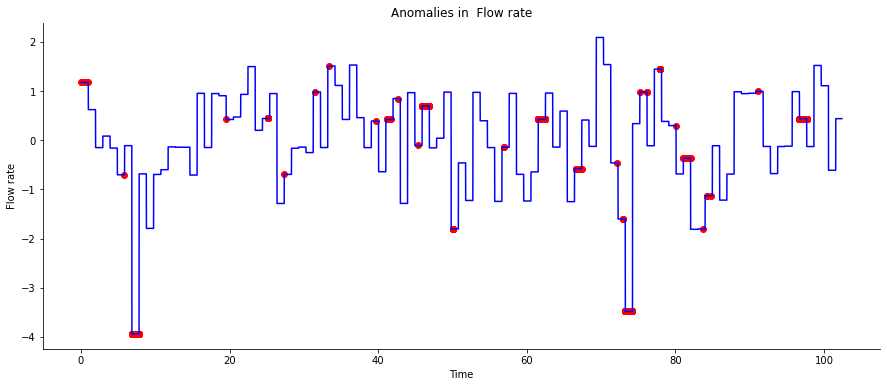

In [86]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

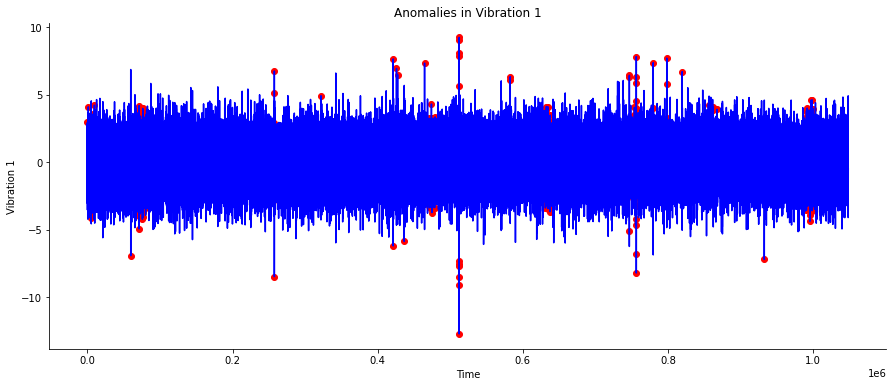

In [87]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

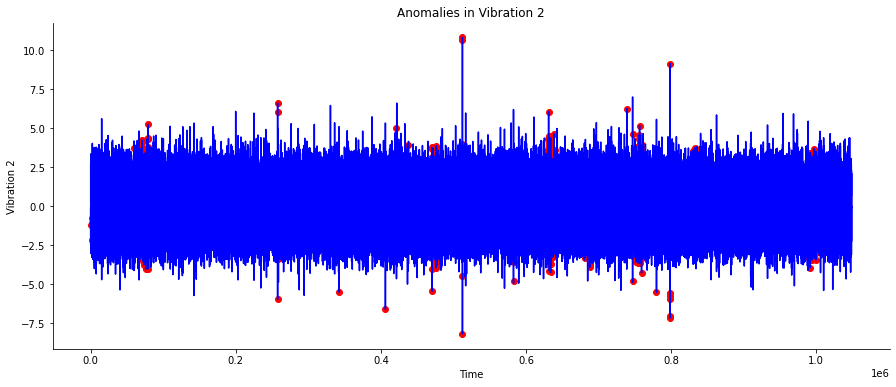

In [88]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

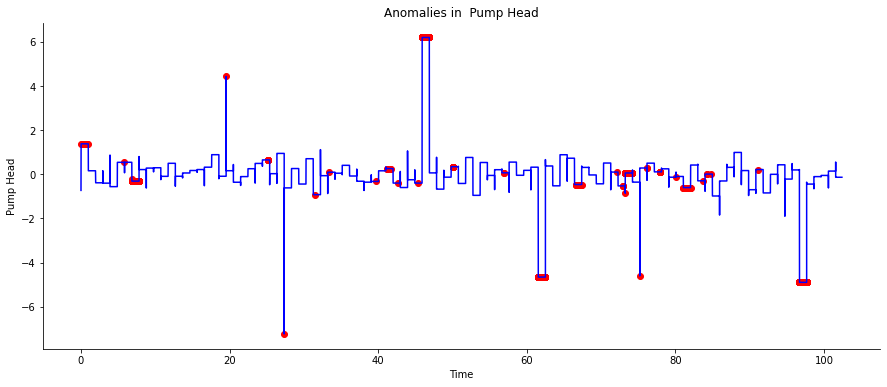

In [89]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

In [90]:
model.save("GRU01_Vib")


INFO:tensorflow:Assets written to: GRU01_Vib\assets


INFO:tensorflow:Assets written to: GRU01_Vib\assets
